# `BUILDING A ML MODEL TO PREDICT ETA FOR YASSIR RIDE HAILING COMPANY` 
#### Using the CRISP-DM framework

## `Business Understanding`


#### Goal/Description
To create a machine learning model to predict the eta for yassir to improve reliability and attractiveness to customers.

#### `Null Hypothesis`
There is no relationship between wind speed and eta

#### `Alternate Hypothesis`
There is a relationship between wind speed and eta

### `Key Metrics and Success Criteria`

The success of this poject will be evaluated based on several key metrics and success criteria including;

• Model Accuracy : The ability of the machine learning model to have minimum margin of error

• Model Interpretability : The degree to which the model's predictions and insights can be understood and utilized by stakeholders.

#### `Analytical Questions`

- Is the train dataset complete (has all the required dates)?
- Which dates have the lowest and highest sales for each year (excluding days the store was closed)?
- Compare the sales for each month across the years and determine which month of which year had the highest sales.
- Did the earthquake impact sales?
- Are certain stores or groups of stores selling more products? (Cluster, city, state, type)
- Are sales affected by promotions, oil prices and holidays?
- What analysis can we get from the date and its extractable features?
- Which product family and stores did the promotions affect.
- What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)
- Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.

## `Data Understanding`

#### Data Source
The data was sourced from Zindi website:
- A train dataset 
- A weather dataset
- A test dataset
 

#### Data Features

- TimeStamp: Identifies the store at which the products are sold.

- Origin_Lat : identifies the type of product sold.

- Origin_Lon : gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

- Destination_lat : gives the total number of items in a product family that were being promoted at a store at a given date.

- Destination_Lon :

- Wind speed :

- sea level pressure :

- air temperature :



#### Data Exploration

##### `Libraries`

In [1]:
#Libraries imported
import pandas as pd
from scipy import stats 
# from scipy.stats import kruskal
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# from sklearn.model_selection import RandomizedSearchCV
# from itertools import product
# from dateutil.parser import parse

# # Seasonal decomposition
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Autocorrelation
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# 

# import statsmodels.api as sm
# from statsmodels.tsa.api import AutoReg
# from statsmodels.tsa.arima.model import ARIMA

In [5]:
##Accessing the train data 
df = pd.read_csv("data/train_data.csv",parse_dates = ['Timestamp'])
df.tail(10)


,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
83914,ZZW9XWMM,2019-11-27 05:49:23+00:00,3.105,36.734,2.951,36.738,20122,1763
83915,ZZWZ113B,2019-12-13 22:18:06+00:00,3.048,36.768,3.050,36.771,419,45
83916,ZZX2SJ7R,2019-12-14 21:19:56+00:00,3.085,36.646,3.083,36.730,15556,2038
83917,ZZXIWAIC,2019-12-06 20:49:50+00:00,3.055,36.774,3.057,36.774,1449,187
83918,ZZXM951D,2019-11-22 00:28:19+00:00,3.075,36.741,3.056,36.773,6699,865
83919,ZZXN4JH2,2019-11-30 23:21:58+00:00,3.121,36.743,3.032,36.770,10321,664
83920,ZZXQ5AQJ,2019-11-27 05:59:31+00:00,3.024,36.749,2.951,36.735,10791,1056
83921,ZZXYPKGU,2019-12-06 05:04:06+00:00,3.189,36.721,3.186,36.721,1139,296
83922,ZZYTQHKT,2019-12-07 05:55:22+00:00,3.046,36.738,2.986,36.766,10637,895
83923,ZZZY11ZN,2019-12-12 21:22:31+00:00,2.889,36.762,2.957,36.758,9363,654


In [6]:
##Accessing the weather data 
w_df = pd.read_csv("data/Weather_data.csv",parse_dates = ['date'])
w_df.head(10)


,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,2019-11-01,290.630524,296.434662,294.125061,101853.617188,292.503998,100806.351562,0.004297,3.561323,0.941695
1,2019-11-02,289.135284,298.432404,295.551666,101225.164062,293.337921,100187.250000,0.001767,5.318593,3.258237
2,2019-11-03,287.667694,296.612122,295.182831,100806.617188,293.674316,99771.414062,0.000797,8.447649,3.172982
3,2019-11-04,287.634644,297.173737,294.368134,101240.929688,292.376221,100200.843750,0.000393,5.991428,2.236700
4,2019-11-05,286.413788,294.284851,292.496979,101131.750000,289.143066,100088.500000,0.004658,6.962730,2.655364
5,2019-11-06,283.408783,292.336121,289.727631,101370.937500,287.188354,100318.976562,0.005435,5.762590,0.564045
6,2019-11-07,283.211395,293.419891,290.415192,101249.843750,286.823730,100201.875000,0.000248,4.003057,2.685759
7,2019-11-08,281.389923,290.577393,288.396332,101331.351562,286.591522,100274.304688,0.005572,6.604807,0.676897
8,2019-11-09,280.681366,291.216400,289.184479,101801.195312,286.891205,100742.281250,0.000360,7.459220,0.228752
9,2019-11-10,282.495880,287.458679,286.003326,101158.304688,283.836639,100094.710938,0.029922,4.831686,0.762374


In [15]:
## Call the train dataframe

train_df=pd.read_csv('data\\store-sales-forecasting\\train.csv',parse_dates = ['date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


### DATA UNDERSTANDING

In [16]:
#Checking for missing values
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

### EDA

In [17]:
### finding missing days in the sales data
train_df.isnull().sum()

start_day = train_df.date.min()
end_day = train_df.date.max()

print(f'Start Date: {start_day} \n\n End Date : {end_day}')

existing_date = pd.date_range(start=start_day,end = end_day,freq="D")

missing_days = existing_date.difference(train_df['date'])
#missing_dates_train = existing_date[~existing_date.isin(train_df.index)]
print(f'The missing dates are : \n\n {missing_days}')

Start Date: 2013-01-01 00:00:00 

 End Date : 2017-08-15 00:00:00
The missing dates are : 

 DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [18]:
# Function to get the day name from a date string


def get_day_name(date_str):
    return date_str.strftime('%A')


day_names = []
# Get day names for each specific date
for date in missing_days:
    day = get_day_name(date)
    day_names.append(day)


print("Day names for specific dates:")
for date, day_name in zip(missing_days, day_names):
    print(f"{date}: {day_name}")

# Create a DataFrame for missing dates
missing_dates_df = pd.DataFrame({'date': pd.to_datetime(missing_days)})
missing_dates_df.shape
    

Day names for specific dates:
2013-12-25 00:00:00: Wednesday
2014-12-25 00:00:00: Thursday
2015-12-25 00:00:00: Friday
2016-12-25 00:00:00: Sunday


(4, 1)

In [19]:

missing_dates_train = existing_date[~existing_date.isin(train_df.index)]
store_nbrs = train_df.store_nbr.unique()
family = train_df.family.unique()

missing_products = list(product(store_nbrs,family,missing_days))
missing_products

[(1, 'AUTOMOTIVE', Timestamp('2013-12-25 00:00:00')),
 (1, 'AUTOMOTIVE', Timestamp('2014-12-25 00:00:00')),
 (1, 'AUTOMOTIVE', Timestamp('2015-12-25 00:00:00')),
 (1, 'AUTOMOTIVE', Timestamp('2016-12-25 00:00:00')),
 (1, 'BABY CARE', Timestamp('2013-12-25 00:00:00')),
 (1, 'BABY CARE', Timestamp('2014-12-25 00:00:00')),
 (1, 'BABY CARE', Timestamp('2015-12-25 00:00:00')),
 (1, 'BABY CARE', Timestamp('2016-12-25 00:00:00')),
 (1, 'BEAUTY', Timestamp('2013-12-25 00:00:00')),
 (1, 'BEAUTY', Timestamp('2014-12-25 00:00:00')),
 (1, 'BEAUTY', Timestamp('2015-12-25 00:00:00')),
 (1, 'BEAUTY', Timestamp('2016-12-25 00:00:00')),
 (1, 'BEVERAGES', Timestamp('2013-12-25 00:00:00')),
 (1, 'BEVERAGES', Timestamp('2014-12-25 00:00:00')),
 (1, 'BEVERAGES', Timestamp('2015-12-25 00:00:00')),
 (1, 'BEVERAGES', Timestamp('2016-12-25 00:00:00')),
 (1, 'BOOKS', Timestamp('2013-12-25 00:00:00')),
 (1, 'BOOKS', Timestamp('2014-12-25 00:00:00')),
 (1, 'BOOKS', Timestamp('2015-12-25 00:00:00')),
 (1, 'BOOKS',

In [20]:
missing_df = pd.DataFrame(missing_products, columns=['store_nbr','family', 'date'])

In [21]:
missing_df

,store_nbr,family,date
0,1,AUTOMOTIVE,2013-12-25
1,1,AUTOMOTIVE,2014-12-25
2,1,AUTOMOTIVE,2015-12-25
3,1,AUTOMOTIVE,2016-12-25
4,1,BABY CARE,2013-12-25
...,...,...,...
7123,9,SCHOOL AND OFFICE SUPPLIES,2016-12-25
7124,9,SEAFOOD,2013-12-25
7125,9,SEAFOOD,2014-12-25
7126,9,SEAFOOD,2015-12-25


In [22]:
# function to create the year,month and days
def calender(df): 

    df['monthname'] = df['date'].dt.month_name()
    df['monthnumber'] = df['date'].dt.month
    df['dayname'] = df['date'].dt.day_name()
    df['day']= df['date'].dt.day
    df['year'] = df['date'].dt.year

    return df

In [23]:
missing_df1= calender(missing_df)

missing_df1

,store_nbr,family,date,monthname,monthnumber,dayname,day,year
0,1,AUTOMOTIVE,2013-12-25,December,12,Wednesday,25,2013
1,1,AUTOMOTIVE,2014-12-25,December,12,Thursday,25,2014
2,1,AUTOMOTIVE,2015-12-25,December,12,Friday,25,2015
3,1,AUTOMOTIVE,2016-12-25,December,12,Sunday,25,2016
4,1,BABY CARE,2013-12-25,December,12,Wednesday,25,2013
...,...,...,...,...,...,...,...,...
7123,9,SCHOOL AND OFFICE SUPPLIES,2016-12-25,December,12,Sunday,25,2016
7124,9,SEAFOOD,2013-12-25,December,12,Wednesday,25,2013
7125,9,SEAFOOD,2014-12-25,December,12,Thursday,25,2014
7126,9,SEAFOOD,2015-12-25,December,12,Friday,25,2015


In [24]:
### Adding the missing dates to the dataframe
# Merge with specific dates to include missing dates
train_df = train_df.reset_index(drop=False)
train_df = pd.concat([train_df, missing_df], ignore_index=True)


In [25]:
train_df['onpromotion'] = train_df['onpromotion'].fillna(0)
train_df['sales'] = train_df['sales'].fillna(0)

In [26]:
train_df = calender (train_df)
train_df.drop(columns=['index','id'],axis=1,inplace= True)
train_df.shape

(3008016, 10)

In [27]:
train_copy = train_df.set_index('date')
train_copy.sales.fillna(0,inplace = True)

In [28]:
train_copy.head(5)

,store_nbr,family,sales,onpromotion,monthname,monthnumber,dayname,day,year
date,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0.0,January,1,Tuesday,1,2013
2013-01-01,1,BABY CARE,0.0,0.0,January,1,Tuesday,1,2013
2013-01-01,1,BEAUTY,0.0,0.0,January,1,Tuesday,1,2013
2013-01-01,1,BEVERAGES,0.0,0.0,January,1,Tuesday,1,2013
2013-01-01,1,BOOKS,0.0,0.0,January,1,Tuesday,1,2013


#### Univariate Analysis

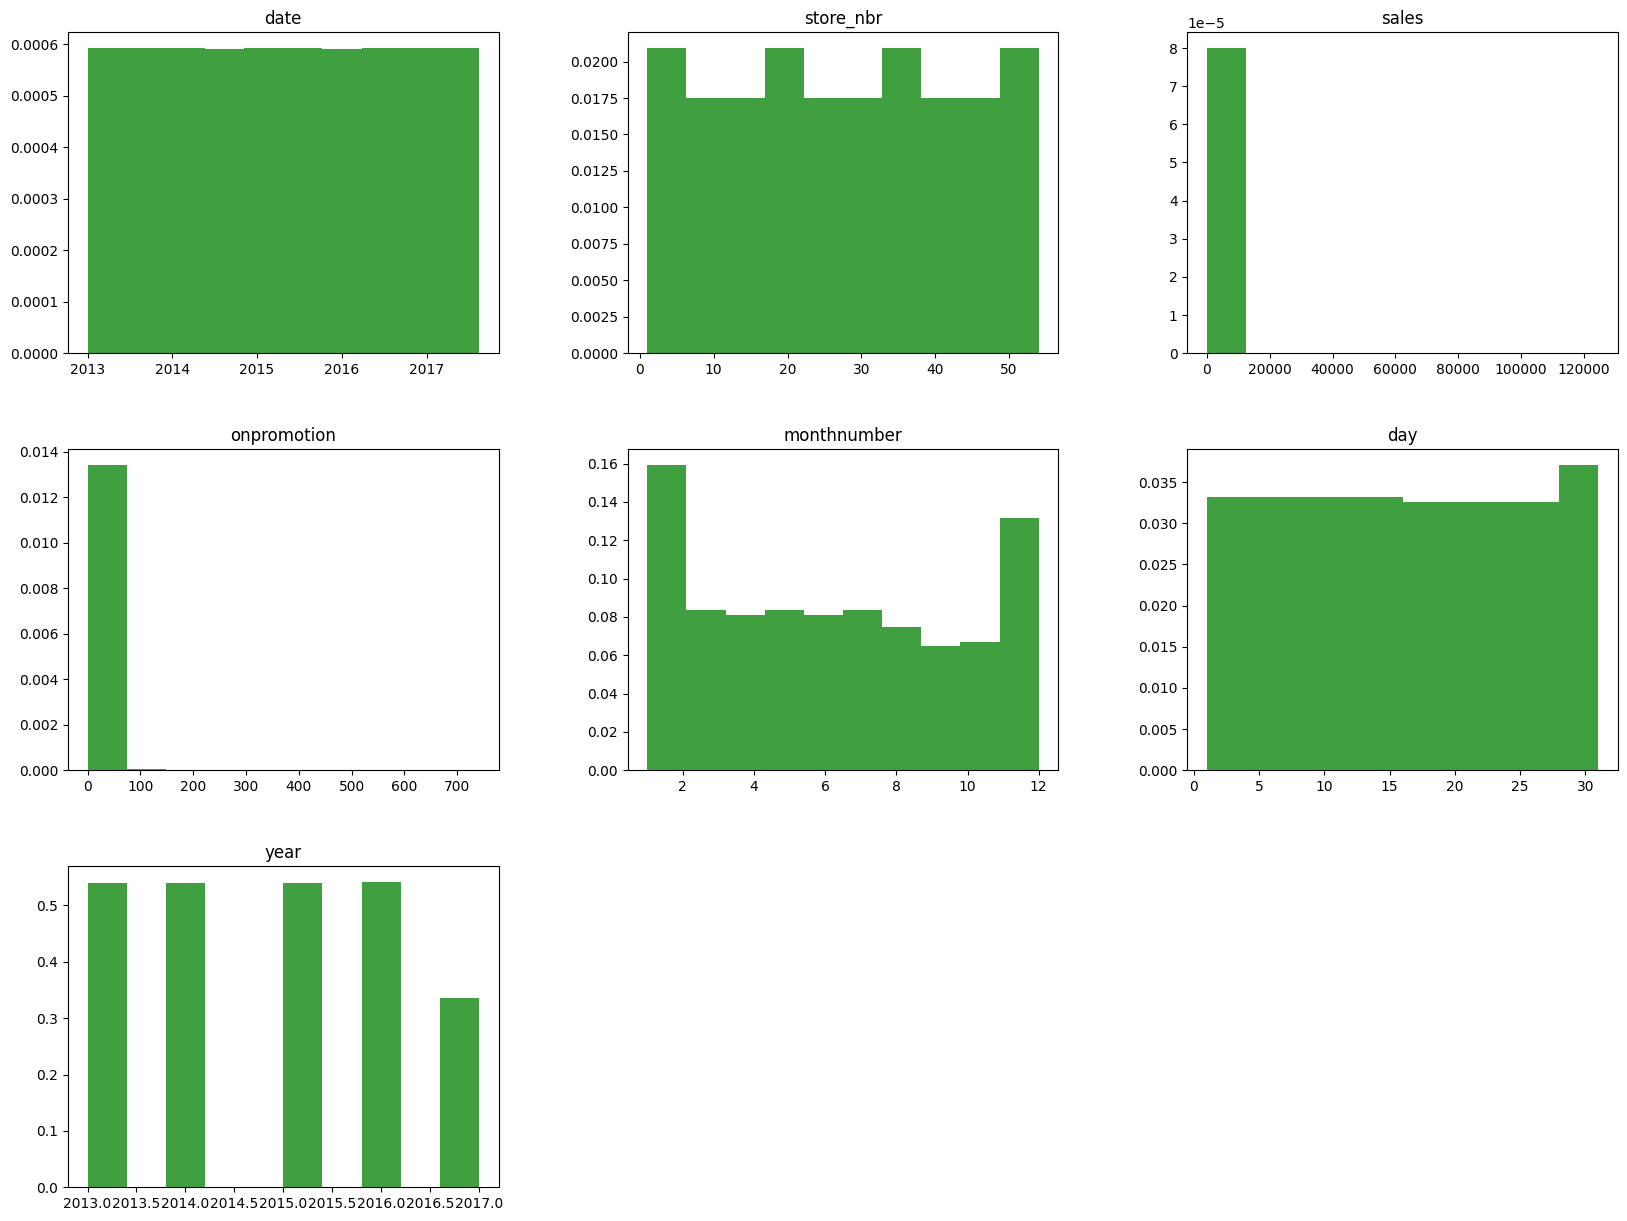

In [29]:
# Distribution of the variables
train_df.hist(density = True,figsize = (20, 15), facecolor = 'green', alpha = 0.75,grid = False)

plt.show()

<Axes: xlabel='sales', ylabel='Density'>

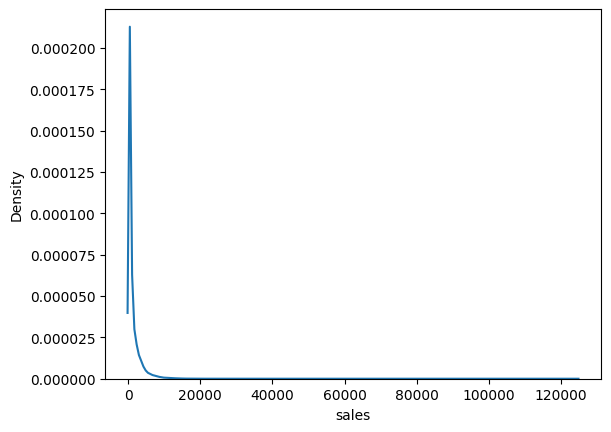

In [30]:
sns.kdeplot(train_df['sales'])

#### Observation
- Sales is left skewed

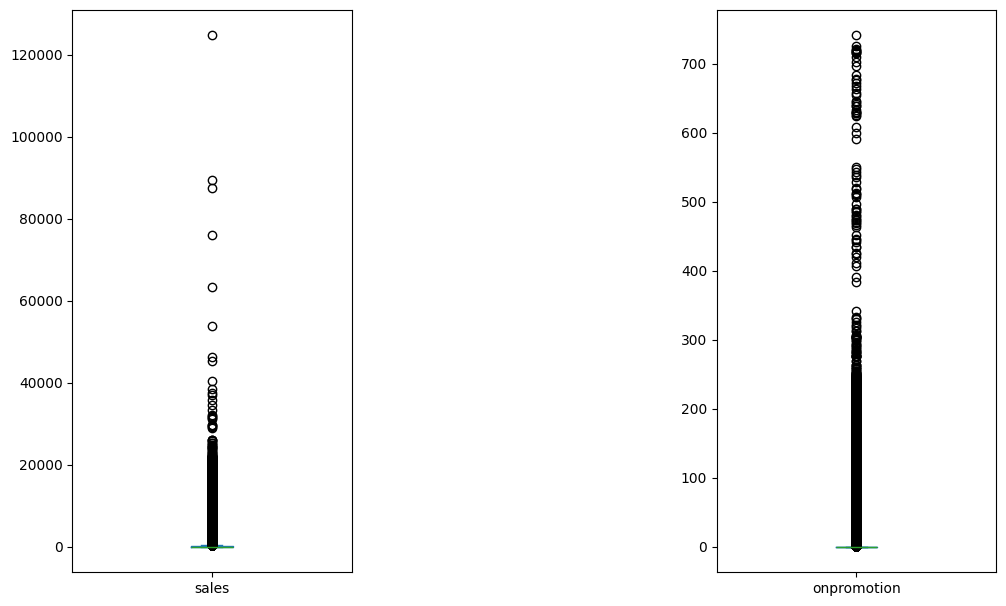

In [31]:
plt.subplot(131)
train_df['sales'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(133)
train_df['onpromotion'].plot.box()
plt.tight_layout(pad=0.5)

##### Observation

- A lot of outliers in sales and promotions

##### BiVariate Analysis

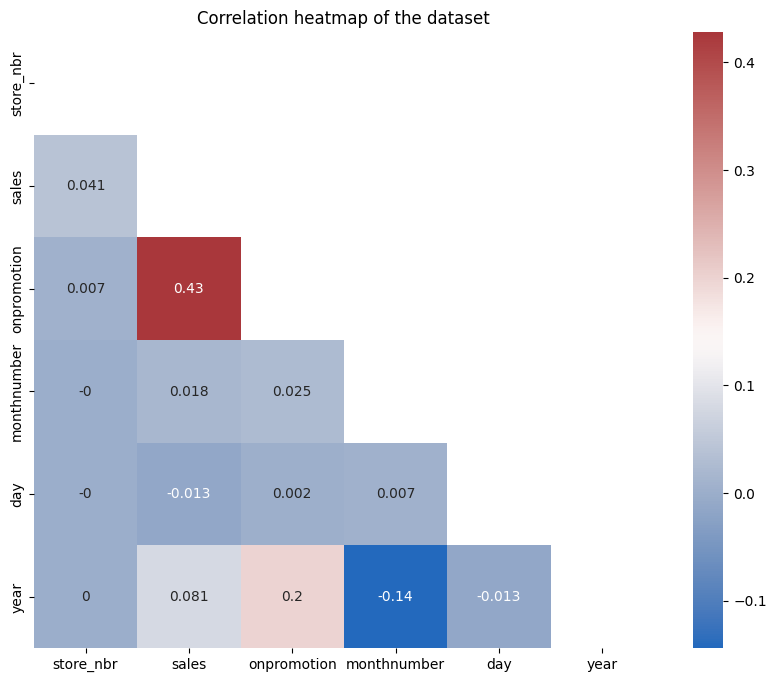

In [32]:
# Summarize the relationships between the variables with a heatmap of the correlations
correlation_matrix = train_copy.corr(numeric_only= True).round(3)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='vlag',mask=mask)
plt.title("Correlation heatmap of the dataset")
plt.show()

##### Observation
- There is a strong positive correlation between sales and promotion.
- There is a positive correlation between month,year and promotion.
- There is a positive correlation between month,year and sales.
- There is a positive correlation between promotion,sales and store_nbr.

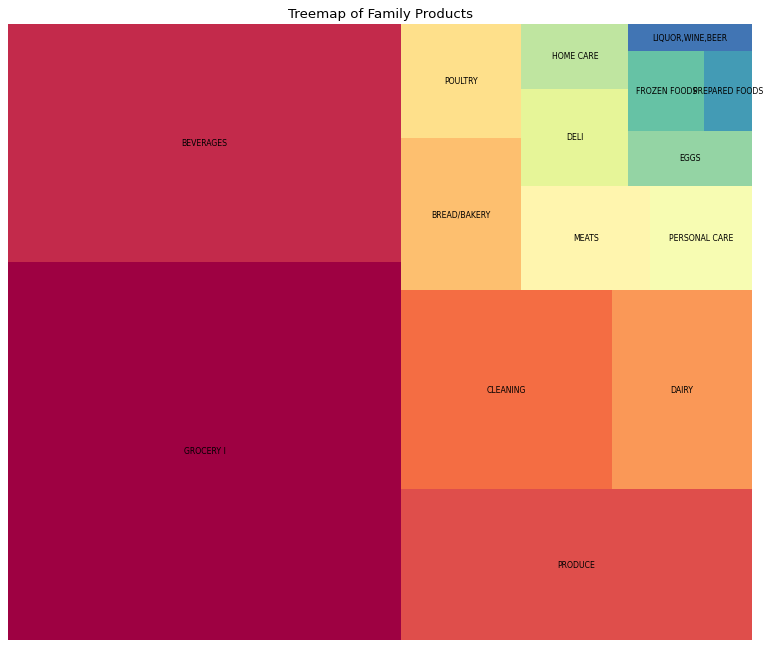

In [33]:



# Prepare Data
df = (train_copy.groupby('family')['sales'].sum()/1000).round(2).reset_index(name='sales').sort_values(by='sales',ascending=False).head(15)
labels = df.family

sizes = df['sales'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,10), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=1.0, text_kwargs={'fontsize': 7}) 

# Decorate
plt.title('Treemap of Family Products')
plt.axis('off')
plt.show()

##### Observation
- Grocery I and Beverages being the most sold family within the time period
- This shows that the mart is mainly known for food and common household items.

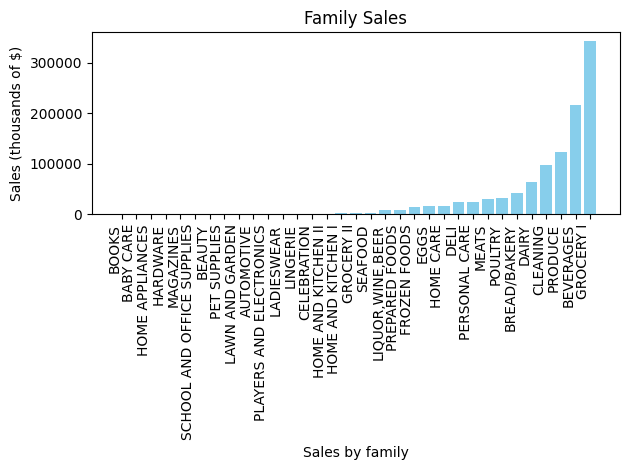

In [34]:
family_sales= (train_df.groupby('family')['sales'].sum()/1000).sort_values(ascending=True)
plt.bar(family_sales.index, family_sales, color='skyblue')
plt.xlabel('Sales by family')
plt.ylabel('Sales (thousands of $)')
plt.title('Family Sales')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


##### Observation
- Grocery I and Beverages being the most sold family within the time period
- Books,baby care and home appliances are the least bought items.
- This shows that the mart is mainly known for food and common household items.

##### Find where there is no promotion

onpromotion_sales= (train_df.groupby('onpromotion')['sales'].sum()/1000000000)
plt.bar(onpromotion_sales.index, onpromotion_sales, color='skyblue')
plt.xlabel('Sales by state')
plt.ylabel('Sales (thousands of $)')
plt.title('State Sales')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [35]:
### Use plotly express here

store_sales= (train_df.groupby('store_nbr')['sales'].sum()/1000).reset_index(name='sales').sort_values(by='sales',ascending = False)
store_sales_sorted=store_sales
store_sales_sorted


,store_nbr,sales
43,44,62087.553250
44,45,54498.010417
46,47,50948.310061
2,3,50481.910185
48,49,43420.095784
45,46,41896.062122
47,48,35933.130274
50,51,32911.489538
7,8,30494.286928
49,50,28653.020625


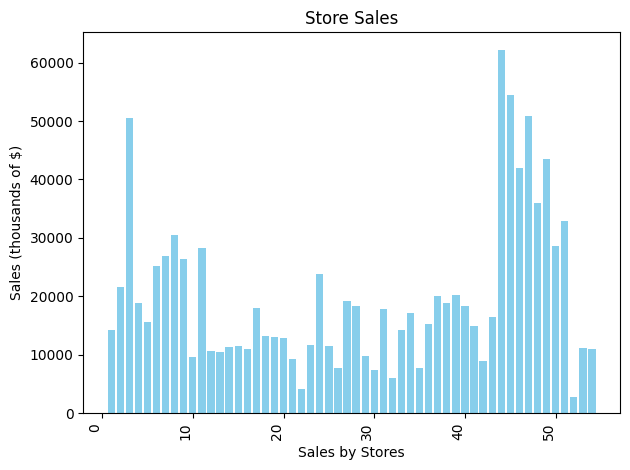

In [36]:

plt.bar(store_sales_sorted.store_nbr, store_sales_sorted.sales, color='skyblue')
plt.xlabel('Sales by Stores')
plt.ylabel('Sales (thousands of $)')
plt.title('Store Sales')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


##### Observation
- Store numbers 44,45,47 and 3 had the most sales ranging from $62 million ~ $50 million
- Store numbers 30,32,22 and 52 had the least sales ranging from $7.4 million ~ $2.3 million
- Further analysis will have to be done to know which products are the least bought so they can be sent else where.

#### Analytical Questions

#### Q1 Is the train dataset complete (has all the required dates)?


In [37]:
#missing dates in sales
missing_dates_df

,date
0,2013-12-25
1,2014-12-25
2,2015-12-25
3,2016-12-25


In [38]:
train_df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
monthname      0
monthnumber    0
dayname        0
day            0
year           0
dtype: int64

##### Observation
- The Mart doesnt open on Christmas day therefore the only mising data is Christmas.

##### Q2 Which dates have the lowest and highest sales for each year (excluding days the store was closed)?


In [39]:
#Taking out all the zero values

non_zero_values = train_df[train_df.sales != 0].set_index('date')
unique_years= train_df.year.unique()
unique_years

data = pd.DataFrame(columns=['year', 'min_sales_date', 'max_sales_date'])

for d in unique_years:
    year= non_zero_values[non_zero_values.year == d]
    min_index = year.sales.idxmin()
    max_index= year.sales.idxmax()

    data.loc[len(data)] = d,min_index,max_index


data

,year,min_sales_date,max_sales_date
0,2013,2013-08-06,2013-11-12
1,2014,2014-12-05,2014-12-08
2,2015,2015-09-15,2015-12-14
3,2016,2016-06-23,2016-05-02
4,2017,2017-02-09,2017-04-02


#### Observation
From the data given : 
- From 2013-2015 ,the company had its maximum sales in the last quarter. 
- From 2016 - 2017 ,the company had its maximum sales mid-year

#### Q3 Compare the sales for each month across the years and determine which month of which year had the highest sales.


In [40]:
###resample or groupby

train_copy.onpromotion.fillna(0,inplace = True)
# Downsample to monthly data by taking the mean
monthly_data = train_copy.sales.resample('ME').sum()



fig = px.line(monthly_data, x=monthly_data.index, y='sales', title='Yearly Sales Trend')

# Show the plot
fig.show()

##### Observation
- December 2016 had the highest sales of $ 29.64 million

#### Q4 Did the earthquake impact sales?


In [41]:
# Filter data between start_date and end_date
start_date = '2016-04-01'
end_date = '2016-04-30'
filtered_data = train_df[(train_df['date'] >= start_date) & (train_df['date'] <= end_date)]

filt=filtered_data.groupby('day')['sales'].sum()/1000000
fig = px.bar(filt, title=f'Store Sales During Earthquake Month',y='sales')

# Show the plot
fig.show()

#### Observation
- Total store sales on the earthquake day is 0.862 billion, sales spiked up by 50% on the 18th of April and this can be attributed to the sale of essentials to earthquake victims.

#### Q5 Are certain stores or groups of stores selling more products? (Cluster, city, state, type)


In [42]:
### Merging the sales and oil dataframes
store_sales_df = pd.merge(train_df, stores_df , on='store_nbr', how='left') 

for a in ['cluster','state','city','type']:

    store_sales= (store_sales_df.groupby(a)['sales'].sum()/1000000)
    store_sales_sorted=store_sales.sort_values(ascending=True)
    fig = px.line(store_sales, x=store_sales.index, y='sales', title=f'Store Sales by {a}')

# Show the plot
    fig.show()


##### Observation
- The Cluster 14 has the most sales of 150 million.
- The Pinchincha State has the most sales of 600 million.
- The Quito City has the most sales of 556 million.
- Store types A and D are closely match in sales of about 350 million.

#### Q6 Are sales affected by promotions, oil prices and holidays?


In [43]:
### Merging the sales and oil dataframes
combined_df = pd.merge(train_df, hdays_df , on='date', how='left')

In [44]:
promotional_sales = combined_df[(combined_df.onpromotion > 0)].sales.sum()/1000000
non_promotional_sales = combined_df[(combined_df.onpromotion == 0)].sales.sum()/1000000

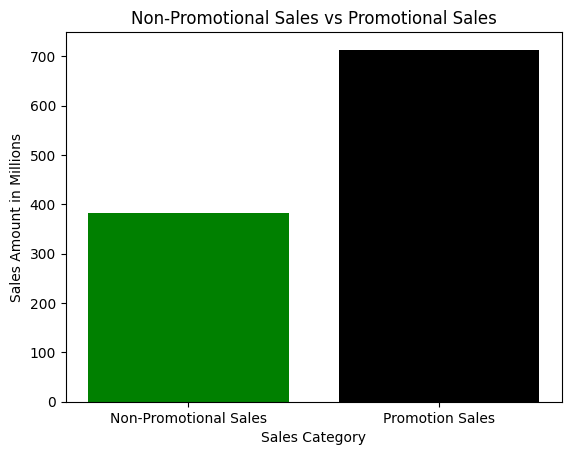

In [45]:
categories = ['Non-Promotional Sales', 'Promotion Sales']
values = [non_promotional_sales, promotional_sales]
colors = ['green','black']
# Create a bar chart
plt.bar(categories, values,color = colors)

# Add labels and title
plt.xlabel('Sales Category')
plt.ylabel('Sales Amount in Millions')
plt.title('Non-Promotional Sales vs Promotional Sales')
plt.show()

In [46]:
### finding missing days in the sales data
oil_df.isnull().sum()

start_day = oil_df.date.min()
end_day = oil_df.date.max()

print(f'Start Date: {start_day} \n\n End Date : {end_day}')

existing_date = pd.date_range(start=start_day,end = end_day,freq="D")

missing_days = existing_date.difference(oil_df['date'])
#missing_dates_train = existing_date[~existing_date.isin(train_df.index)]
print(f'The missing dates are : \n\n {missing_days}')

Start Date: 2013-01-01 00:00:00 

 End Date : 2017-08-31 00:00:00
The missing dates are : 

 DatetimeIndex(['2013-01-05', '2013-01-06', '2013-01-12', '2013-01-13',
               '2013-01-19', '2013-01-20', '2013-01-26', '2013-01-27',
               '2013-02-02', '2013-02-03',
               ...
               '2017-07-29', '2017-07-30', '2017-08-05', '2017-08-06',
               '2017-08-12', '2017-08-13', '2017-08-19', '2017-08-20',
               '2017-08-26', '2017-08-27'],
              dtype='datetime64[ns]', length=486, freq=None)


In [47]:
# Function to get the day name from a date string
from dateutil.parser import parse

def get_day_name(date_str):
    return date_str.strftime('%A')

day_names = []
# Get day names for each specific date
for date in missing_days:
    day = get_day_name(date)
    day_names.append(day)

print("Day names for specific dates:")
for date, day_name in zip(missing_days, day_names):
    print(f"{date}: {day_name}")

# Create a DataFrame for missing dates
missing_dates_df = pd.DataFrame({'date': pd.to_datetime(missing_days)})
missing_dates_df.shape
    

Day names for specific dates:
2013-01-05 00:00:00: Saturday
2013-01-06 00:00:00: Sunday
2013-01-12 00:00:00: Saturday
2013-01-13 00:00:00: Sunday
2013-01-19 00:00:00: Saturday
2013-01-20 00:00:00: Sunday
2013-01-26 00:00:00: Saturday
2013-01-27 00:00:00: Sunday
2013-02-02 00:00:00: Saturday
2013-02-03 00:00:00: Sunday
2013-02-09 00:00:00: Saturday
2013-02-10 00:00:00: Sunday
2013-02-16 00:00:00: Saturday
2013-02-17 00:00:00: Sunday
2013-02-23 00:00:00: Saturday
2013-02-24 00:00:00: Sunday
2013-03-02 00:00:00: Saturday
2013-03-03 00:00:00: Sunday
2013-03-09 00:00:00: Saturday
2013-03-10 00:00:00: Sunday
2013-03-16 00:00:00: Saturday
2013-03-17 00:00:00: Sunday
2013-03-23 00:00:00: Saturday
2013-03-24 00:00:00: Sunday
2013-03-30 00:00:00: Saturday
2013-03-31 00:00:00: Sunday
2013-04-06 00:00:00: Saturday
2013-04-07 00:00:00: Sunday
2013-04-13 00:00:00: Saturday
2013-04-14 00:00:00: Sunday
2013-04-20 00:00:00: Saturday
2013-04-21 00:00:00: Sunday
2013-04-27 00:00:00: Saturday
2013-04-28 0

(486, 1)

In [48]:
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].bfill()

In [49]:
### Merging the sales and oil dataframes
combined_df = pd.merge(train_df, oil_df , on='date', how='left')
combined_df = combined_df.dropna()
combined_df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
monthname      0
monthnumber    0
dayname        0
day            0
year           0
dcoilwtico     0
dtype: int64

In [50]:
oil_sales = combined_df.sort_values(by='dcoilwtico', ascending=False)

# Select the first 50 rows and sum their 'sales' values
sum_of_top_50_sales = oil_sales['sales'].head(50).sum()/1000000

# Select the last 50 rows and sum their 'sales' values
sum_of_bottom_50_sales = oil_sales['sales'].tail(50).sum()/1000000


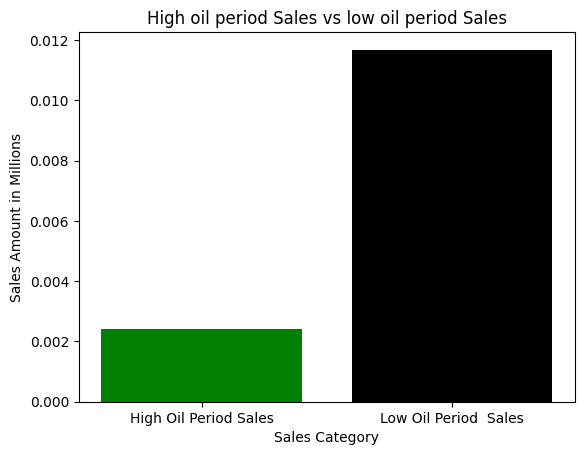

In [51]:
categories = ['High Oil Period Sales', 'Low Oil Period  Sales']
values = [sum_of_top_50_sales , sum_of_bottom_50_sales ]
colors = ['green','black']
# Create a bar chart
plt.bar(categories, values,color = colors)

# Add labels and title
plt.xlabel('Sales Category')
plt.ylabel('Sales Amount in Millions')
plt.title('High oil period Sales vs low oil period Sales')
plt.show()

In [52]:
### Merging the sales and oil dataframes
combined_df = pd.merge(train_df, hdays_df , on='date', how='left')
combined_df = combined_df.dropna()

In [53]:
####Looking holidays only
holiday_sales = combined_df[(combined_df.type == 'Holiday')].sales.sum()/1000000
non_holiday_sales = combined_df[(combined_df.type != 'Holiday')].sales.sum()/1000000


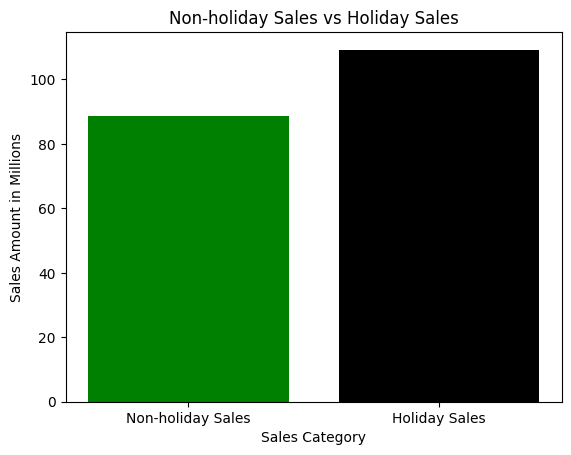

In [54]:
categories = ['Non-holiday Sales', 'Holiday Sales']
values = [non_holiday_sales, holiday_sales]
colors = ['green','black']

# Create a bar chart
plt.bar(categories, values,color = colors)

# Add labels and title
plt.xlabel('Sales Category')
plt.ylabel('Sales Amount in Millions')
plt.title('Non-holiday Sales vs Holiday Sales')
plt.show()

#### Observation

- It can be clearly seen that sales are much higher on promotion days or low oil price periods.
- The difference in holiday and non-holiday sales is not vast.

### Q7 What analysis can we get from the date and its extractable features?

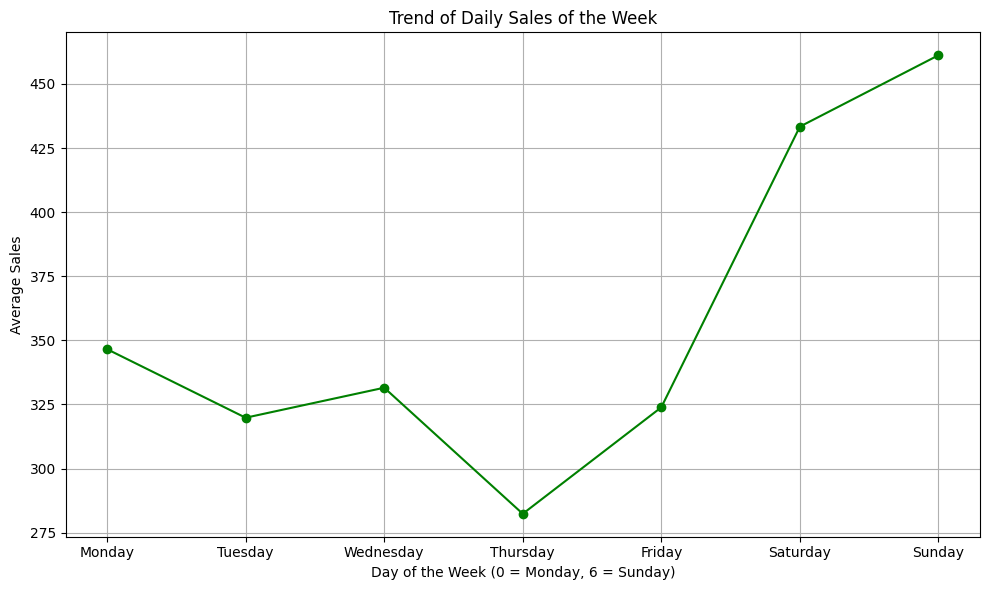

In [55]:
train_df.head(5)
# Group by day of the week and calculate the mean sales for each day
daily_sales = train_df.groupby(train_df['date'].dt.dayofweek)['sales'].mean()

daily_sales
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o',color= 'green')

# Customize the plot
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Sales')
plt.title('Trend of Daily Sales of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


##### Observation
- The stores are very busy on weekends as compared to weekdays.

#### Q8 Which product family and stores did the promotions affect.


In [56]:
promotions_df = store_sales_df[store_sales_df.onpromotion != 0]
promotions_df.head(3)

,date,store_nbr,family,sales,onpromotion,monthname,monthnumber,dayname,day,year,city,state,type,cluster
810784,2014-04-01,9,CLEANING,1752.0,3.0,April,4,Tuesday,1,2014,Quito,Pichincha,B,6
810789,2014-04-01,9,GROCERY I,7685.0,5.0,April,4,Tuesday,1,2014,Quito,Pichincha,B,6
812571,2014-04-02,9,GROCERY I,6481.0,3.0,April,4,Wednesday,2,2014,Quito,Pichincha,B,6


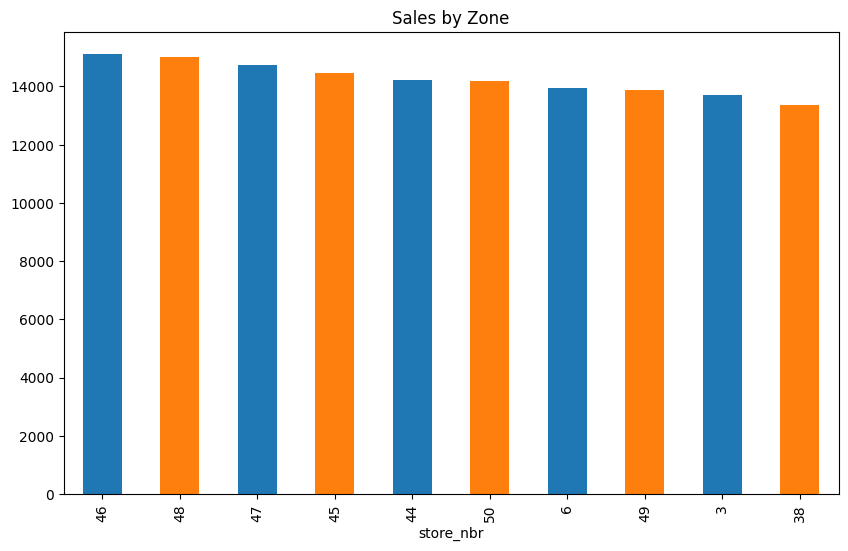

In [57]:
promotions_stores = promotions_df.groupby(['store_nbr'])['onpromotion'].count().sort_values(ascending=False)

promotions_stores.head(10)
promotions_top_10=promotions_stores.head(10)
colors = plt.cm.tab10(np.arange(len(categories)))
promotions_top_10.plot(kind='bar', x='store_nbr', y='onpromotion', title = 'Sales by Zone', 
 figsize = (10,6),color = colors);



#### Observation

- It can be observed that most of the promotions were done in 2016-2017 which can speak to the highest sales deviating from the usual Christmas period to May
- Store number 53 in Manta,Manabi had the overall highest number of promotions which occured in May,2016 
- Store number 54 in El Carmen in the same state as store number 53 followed closely with 797 promotions.


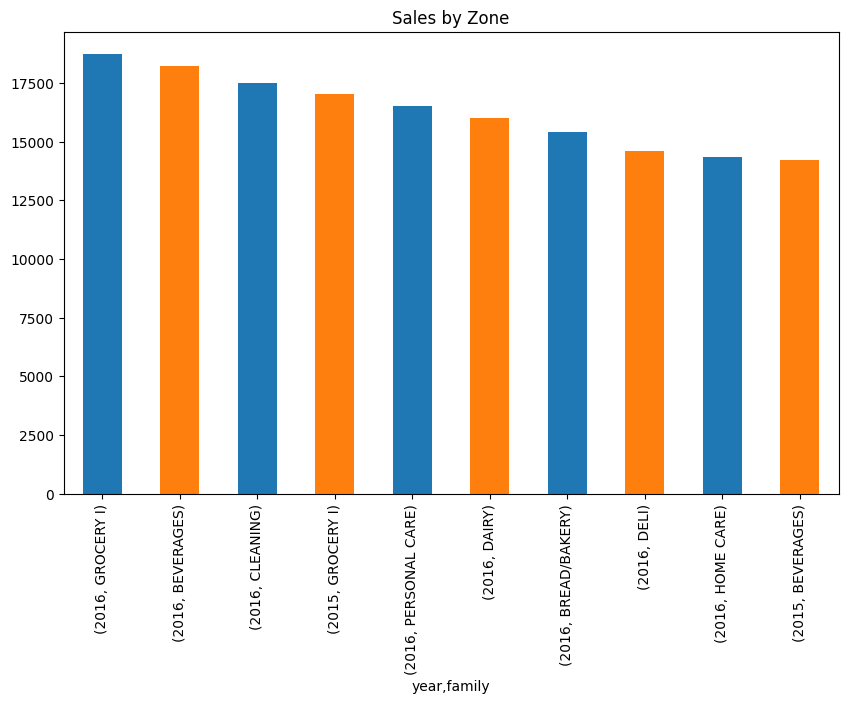

In [58]:
promotions_family = promotions_df.groupby(['year','family'])['onpromotion'].count().sort_values(ascending=False)
promotions_top_10=promotions_family.head(10)
colors = plt.cm.tab10(np.arange(len(categories)))
promotions_top_10.plot(kind='bar', x='family', y='onpromotion', title = 'Sales by Zone', 
 figsize = (10,6),color = colors);
### Graph

#### Observation

- It can be observed that most of the promotions were done in 2015–2016 which can speak to the highest sales deviating from the usual Christmas period to May in 2016.
- Store numbers,46,48 and 47, has the highest promotions. 
- The family products with the highest promotions ascertains that the stores are mostly patronized by families.


#### Q9 Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.

In [59]:
salary_15th_day_df = store_sales_df[(store_sales_df.day == 15)].sales.sum()/1000000
salary_days_df = store_sales_df[(store_sales_df.day > 25)].sales.sum()/1000000
normal_days_df = store_sales_df[(store_sales_df.day != 15) & (store_sales_df.day < 25)].sales.sum()/1000000

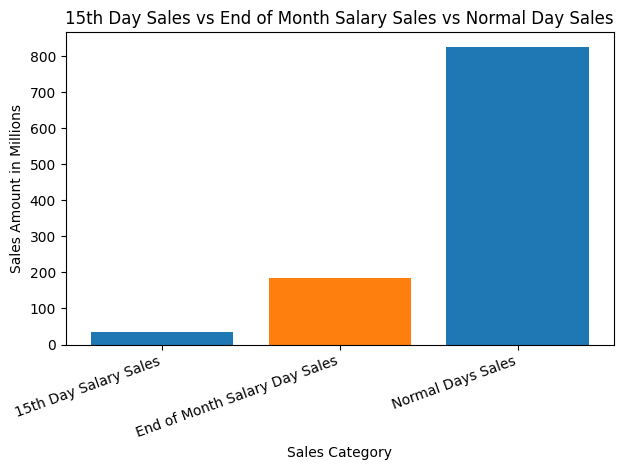

In [60]:
categories = ['15th Day Salary Sales', 'End of Month Salary Day Sales','Normal Days Sales']
values = [salary_15th_day_df,salary_days_df,normal_days_df]

# Create a bar chart
plt.bar(categories, values, color= colors)
colors = ['green','black']
# Add labels and title
plt.xlabel('Sales Category')
plt.ylabel('Sales Amount in Millions')
plt.title('15th Day Sales vs End of Month Salary Sales vs Normal Day Sales')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

##### Observation
- Sales clearly doesnt depend on salary days

In [61]:
combined_df.to_csv("data\data_cleaned.csv")

### Hypothesis
#There is no relationship between the average sales and the average sales on promotion.

In [62]:
#Checking Normality of the data 

def check_normality(data,name):
    test_stat_normality, p_value_normality = stats.shapiro(data)
    print("p value:%.20f" % p_value_normality)
    if p_value_normality < 0.05:
        print(f"Reject null hypothesis >> The data for {name} is not normally distributed")
    else:
        print(f"Fail to reject null hypothesis >> The data for {name} is normally distributed")

In [63]:
train_copy.head(2)

,store_nbr,family,sales,onpromotion,monthname,monthnumber,dayname,day,year
date,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0.0,January,1,Tuesday,1,2013
2013-01-01,1,BABY CARE,0.0,0.0,January,1,Tuesday,1,2013


In [64]:
onpromo = train_copy[train_copy.onpromotion != 0].sales
avg_sales= train_copy.sales

In [65]:
#Normality Checks
check_normality(onpromo,'Onpromo')
check_normality(avg_sales,'Sales')

p value:0.00000000000000000000
Reject null hypothesis >> The data for Onpromo is not normally distributed
p value:0.00000000000000000000
Reject null hypothesis >> The data for Sales is not normally distributed


In [66]:
#Using the P-Levene to test the Hypothesis
stat, pvalue_levene = stats.levene(onpromo,avg_sales )

print("p value:%.10f" % pvalue_levene)
if pvalue_levene < 0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0000000000
Reject null hypothesis >> The variances of the samples are different.


##### Observation 
- Data samples are not normally distributed
- The variances of the samples are different
- Therefore a Non-Parametric test must be done (Kruskal Test)

In [67]:
#Kruskal Test

stat, p = kruskal(onpromo,avg_sales )
print('Statistics=%.3f, p=%.15f' % (stat, p))

if p > 0.05:
 print('All sample distributions are the same (fail to reject H0)')
else:
 print('One or more sample distributions are not equal distributions (reject null Hypothesis)')

Statistics=546943.953, p=0.000000000000000
One or more sample distributions are not equal distributions (reject null Hypothesis)


In [68]:
#perform two sample t-test
results= stats.ttest_ind(a=onpromo, b=avg_sales) 

print(results.pvalue,results.statistic)

print("p value:%.7f" % results.pvalue)
if results.pvalue < 0.05:
    print(f"Reject null hypothesis >> Since the p_value {results.pvalue} is less than 0.05")
else:
    print(f"Fail to reject null hypothesis >> Since the p_value {results.pvalue} is greater than 0.05")

0.0 435.18547128579235
p value:0.0000000
Reject null hypothesis >> Since the p_value 0.0 is less than 0.05


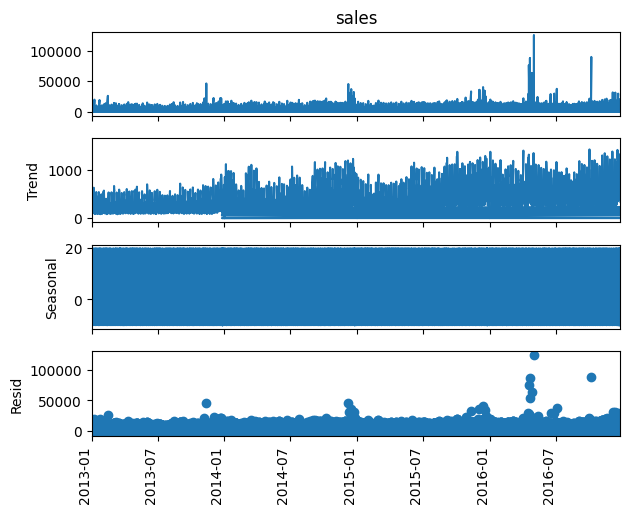

In [69]:
mplstyle.use('fast')
#ts = train_copy.set_index('date')['sales'] 
result = seasonal_decompose(train_copy.sales, model='additive', period=365,extrapolate_trend= 'freq')

result.plot()
plt.xticks(rotation=90, ha='right')
plt.show()

#### Observation
- There is a trend in the train data
- There are residuals present in the train data

In [70]:
train_copy.sales

date
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
             ... 
2016-12-25    0.0
2013-12-25    0.0
2014-12-25    0.0
2015-12-25    0.0
2016-12-25    0.0
Name: sales, Length: 3008016, dtype: float64

In [71]:
train_copy['log_sales'] = np.log10(train_copy.sales)
train_copy['log_sales'].head(100)

date
2013-01-01   -inf
2013-01-01   -inf
2013-01-01   -inf
2013-01-01   -inf
2013-01-01   -inf
             ... 
2013-01-01   -inf
2013-01-01   -inf
2013-01-01   -inf
2013-01-01   -inf
2013-01-01   -inf
Name: log_sales, Length: 100, dtype: float64

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

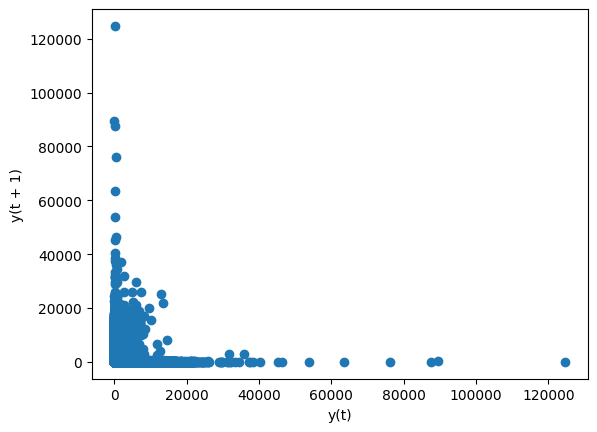

In [72]:
### Autocorelation 
pd.plotting.lag_plot(train_copy.sales,lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 3)'>

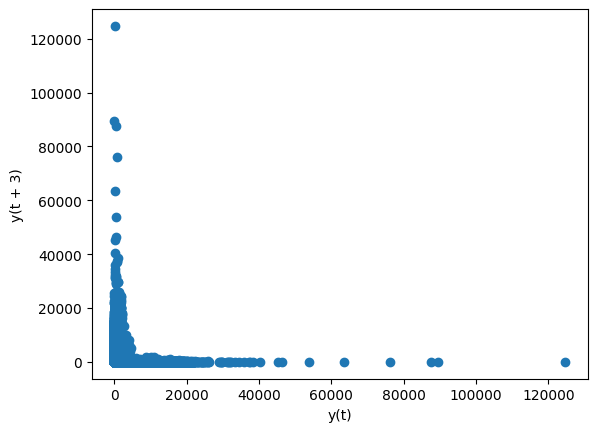

In [73]:
### Autocorelation 
pd.plotting.lag_plot(train_copy.sales,lag=3)

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

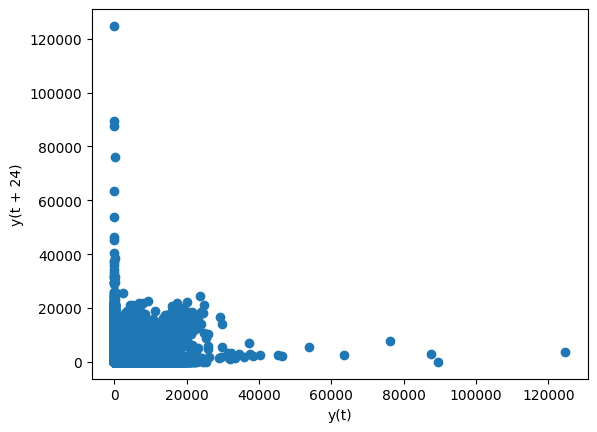

In [74]:
### Autocorelation 
pd.plotting.lag_plot(train_copy.sales,lag=24)

Positve correlation

In [75]:
weekly_sales = train_copy.sales.resample("W").sum()/1000
weekly_sales.head(3)

date
2013-01-06    2211.570467
2013-01-13    2373.617836
2013-01-20    2368.007430
Freq: W-SUN, Name: sales, dtype: float64

In [76]:
len(weekly_sales)

242

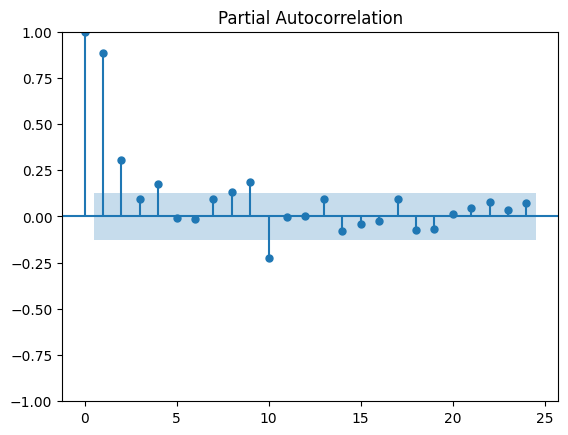

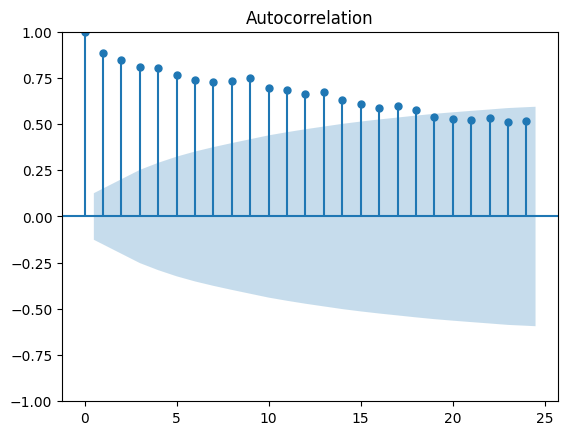

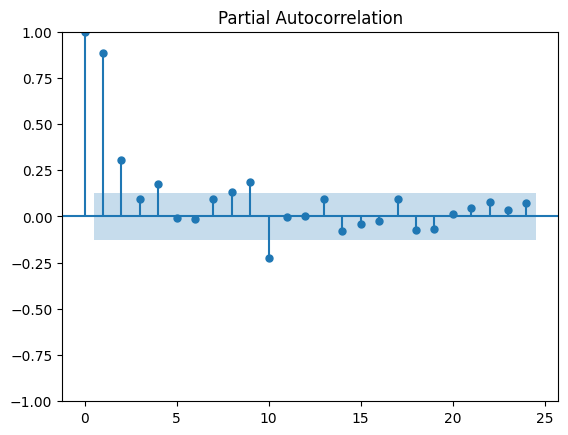

In [77]:
# plot the auto correlation
plot_acf(weekly_sales)

plot_pacf(weekly_sales)

#### Observation
- For Autocorrelation graph, the rate of decay is somewhat slow with increasing lags showing signs of trended time series
- For the PACF plot,some of the lag are out of the band.

In [78]:
## Autocorrelation Tests using Ljung-Box method

from statsmodels.stats.diagnostic import acorr_ljungbox


# Perform the Ljung-Box test
lags = 5  # Number of lags to consider
results = acorr_ljungbox(weekly_sales, lags=lags,return_df=True)

# Print the test statistic and p-value
lb_p_value = results['lb_pvalue'][1] 
lb_test_statistic = results['lb_stat'][1] 



if lb_p_value < 0.05:
    print('Reject null hypothesis of no autocorrelation')
else:
    print('Accept null hypothesis of no autocorrelation')


Reject null hypothesis of no autocorrelation


In [79]:
## Test for stationarity using AD Fuller Test

from statsmodels.tsa.stattools import adfuller
 

# ADF Test
result = adfuller(weekly_sales)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
if result[1] > 0.05:
    print('The AdFuller test fails to reject the null hypothesis and therefore is not Stationary')
else:
    print('The Series is stationary')

ADF Statistic: -1.9137834914190974
n_lags: 0.32560496181472726
p-value: 0.32560496181472726
Critial Values:
   1%, -3.458854867412691
Critial Values:
   5%, -2.8740800599399323
Critial Values:
   10%, -2.573453223097503
The AdFuller test fails to reject the null hypothesis and therefore is not Stationary


In [80]:
## removing seasonality

In [137]:
weekly_sales = train_copy.sales.resample("D").sum()
weekly_sales.head(3)


date
2013-01-01      2511.618999
2013-01-02    496092.417944
2013-01-03    361461.231124
Freq: D, Name: sales, dtype: float64

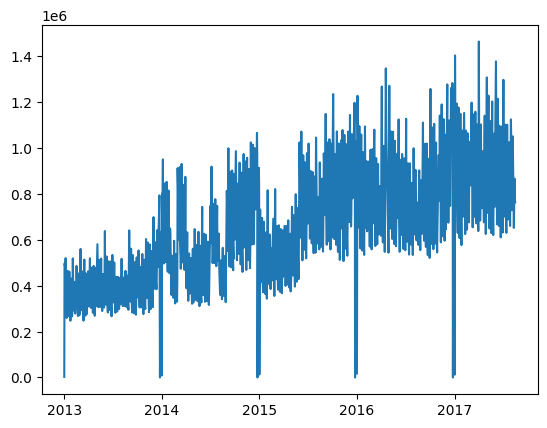

In [138]:
plt.plot(weekly_sales)
plt.show()


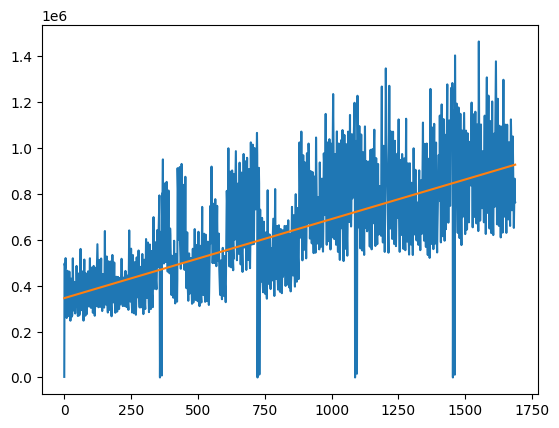

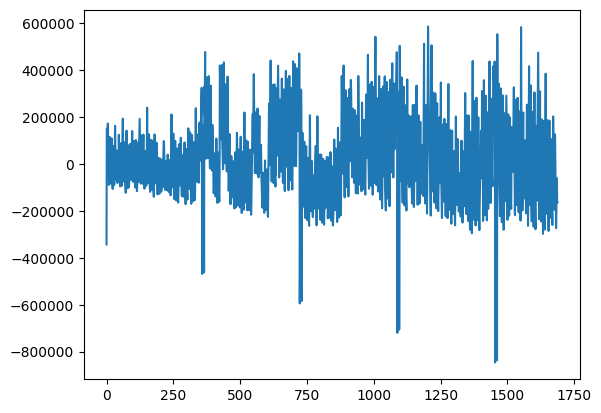

In [139]:
### removing trend (detrending data)
'''Detrending can be done by finding the log,differencing or model fitting'''


from sklearn.linear_model import LinearRegression

import numpy

series = weekly_sales
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
plt.plot(detrended)
plt.show()

<Axes: xlabel='date'>

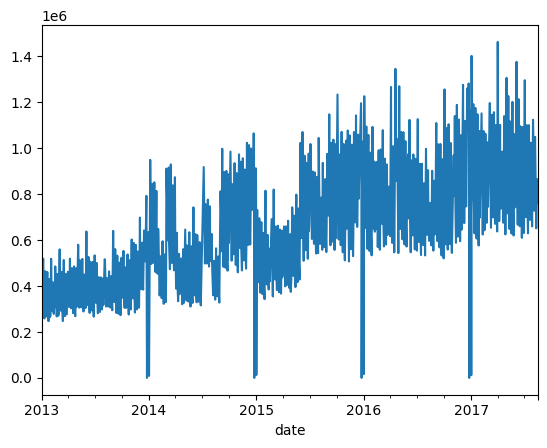

In [140]:
weekly_sales.plot()

In [141]:
# Create an empty DataFrame with columns
df = pd.DataFrame(columns=['date', 'detrend'])
df['date'] = weekly_sales.index
df['date'] = pd.to_datetime(df['date'])

df['detrend'] = detrended

df.set_index('date')



,detrend
date,
2013-01-01,-343045.585139
2013-01-02,150190.829238
2013-01-03,15215.257849
2013-01-04,7869.319249
2013-01-05,130415.378817
...,...
2017-08-11,-98782.711162
2017-08-12,-132870.282674
2017-08-13,-60205.524850


<Axes: >

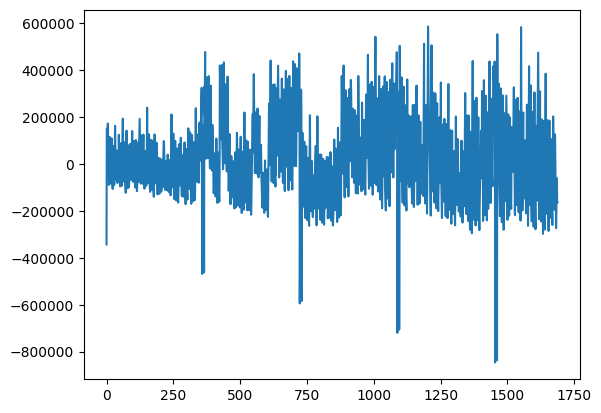

In [142]:
df.detrend.plot()

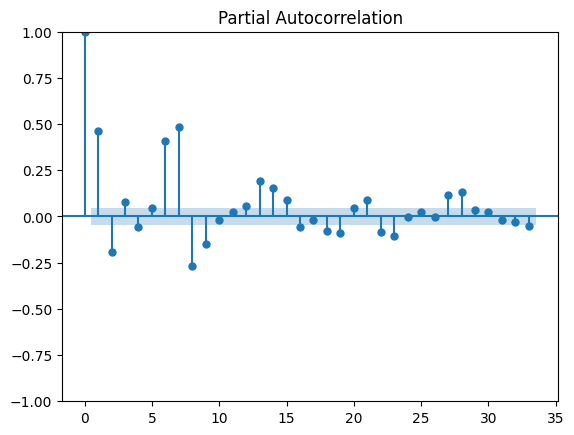

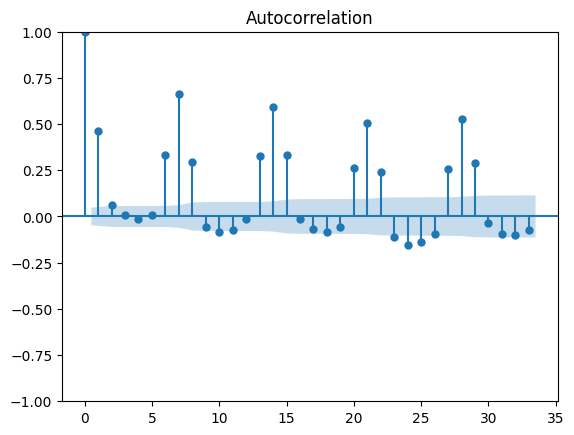

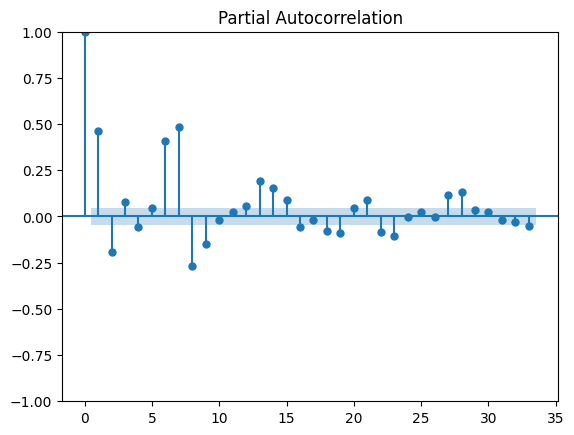

In [143]:
# plot the auto correlation
plot_acf(df.detrend)

plot_pacf(df.detrend)

#### Observation
- Rate of decay has increased exponentially showing signs of stationarity of the data.

In [1]:
import streamlit

ModuleNotFoundError: No module named 'streamlit'

In [144]:
# ADF Test
result = adfuller(df.detrend)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
if result[1] > 0.05:
    print('The AdFuller test fails to reject the null hypothesis and therefore is not Stationary')
else:
    print('The Series is stationary')


ADF Statistic: -5.735993415285782
n_lags: 6.436599122182337e-07
p-value: 6.436599122182337e-07
Critial Values:
   1%, -3.434283579780684
Critial Values:
   5%, -2.863277451883613
Critial Values:
   10%, -2.5676949772294817
The Series is stationary


### Time series analysis is a method used for analysing time series data in order to extract meaningful statistical information from the data. Time series forecasting however, is all about predicting future values based on previously observed values over time.

##### 10 time series forecasting algorithm
- Autoregressive (AR)
- Autoregressive Integrated Moving Average (ARIMA) for stationary data
- Seasonal Autoregressive Integrated Moving Average (SARIMA) for seasonal data
- Exponential Smoothing (ES)
- XGBoost
- Prophet
- LSTM (Deep Learning)
- DeepAR
- N-BEATS
- Temporal Fusion Transformer (Google)

#### Building Statistical models for time series data

## ARIMA

from pmdarima import auto_arima

stepwise_fit = auto_arima(detrended,trace=True,suppress_warnings = True)
stepwise_fit.summary()


In [145]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,root_mean_squared_log_error,mean_absolute_percentage_error

##### ARIMA Model

- Auto-Regressive (p) -> Number of autoregressive terms.

- Integrated (d) -> Number of nonseasonal differences needed for stationarity.

- Moving Average (q) -> Number of lagged forecast errors in the prediction equation.

- In the Auto ARIMA model, note that small p,d,q values represent non-seasonal components, and capital P, D, Q represent seasonal components. 
- To find the optimal value of p, d, and q with different combinations and the final values would be determined with the lower AIC, BIC parameters
- https://www.justintodata.com/arima-models-in-python-time-series-prediction/

In [146]:
from pmdarima.arima import auto_arima

In [148]:
len(df)

1688

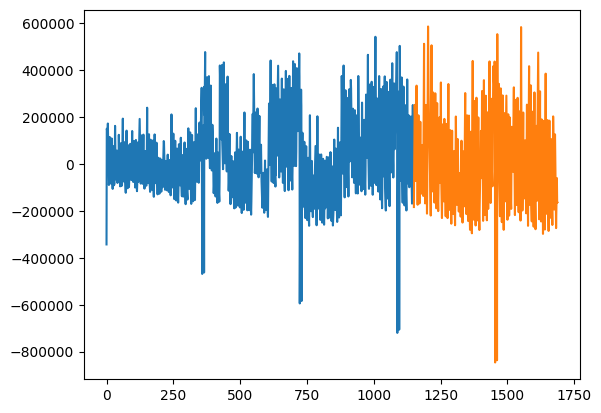

In [149]:
train=df.detrend[:1150]
test = df.detrend[-538:]
plt.plot(train)
plt.plot(test)
#plt.plot(df.detrend)

In [175]:
arima_model = auto_arima(train,m=1000,seasonal=True,suppress_warnings=True,error_action='warn',trace=True,n_jobs=-1)##m=7

Performing stepwise search to minimize aic


In [171]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1150
Model:             SARIMAX(4, 1, 4)x(0, 0, [1], 5)   Log Likelihood              -14912.538
Date:                             Mon, 27 May 2024   AIC                          29845.077
Time:                                     15:27:06   BIC                          29895.543
Sample:                                          0   HQIC                         29864.128
                                            - 1150                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8453      0.024     34.653      0.000       0.797       0.893
ar.L2         -1.3781      0.032    -42.687      0.000      -1.441      -1.315
ar.L3          0.7050      0.031     22.871      0.000       0.645       0.765
ar.L4         -0.8677      0.018    -47.546      0.000      -0.903      -0.832
ma.L1         -1.3135      0.037    -35.449      0.000      -1.386      -1.241
ma.L2          1.5255      0.055     27.747      0.000       1.418       1.633
ma.L3         -0.7935      0.056    -14.095      0.000      -0.904      -0.683
ma.L4          0.4601      0.037     12.524      0.000       0.388       0.532
ma.S.L5        0.1849      0.036      5.174      0.000       0.115       0.255
sigma2      1.597e+10   4.12e-12   3.88e+21      0.000     1.6e+10     1.6e+10
===================================================================================
Ljung-Box (L1) (Q):                  11.83   Jarque-Bera (JB):             28224.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.72   Skew:                            -1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.16e+36. Standard errors may be unstable.
"""

In [172]:
prediction = pd.DataFrame(arima_model.predict(n_periods = len(test)),index=test.index)
prediction.columns=['predicted_sales']
prediction

,predicted_sales
1150,-146460.712196
1151,-94082.452764
1152,94913.748096
1153,127365.534431
1154,-39937.875069
...,...
1683,-42406.335603
1684,-40948.163015
1685,-39831.161725
1686,-39882.264963


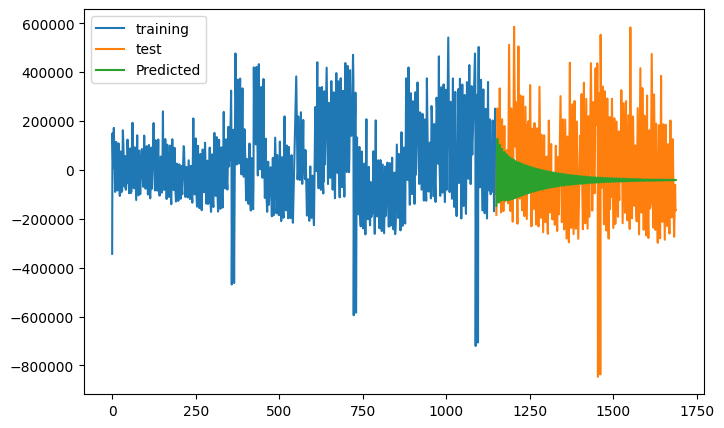

In [173]:
plt.figure(figsize=(8,5))
plt.plot(train,label='training')
plt.plot(test,label='test')
plt.plot(prediction,label='Predicted')
plt.legend()
plt.show()

In [156]:
mae = mean_absolute_error(test, prediction)
mse = mean_squared_error(test, prediction)
mape = mean_absolute_percentage_error(test, prediction)
#rmse=np.sqrt(root_mean_squared_error(test, prediction))
rmse=root_mean_squared_error(test, prediction)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 1234835.7224665142
MSE: 2291728478876.4663
RMSE: 1513845.5928120497
MAPE: 24.573329409106616


In [97]:
#Triple exponential smoothening :a time series forecasting method for univariate data.
'''Exponential smoothing forecasting methods are similar in that a prediction is a weighted sum of past observations, 
but the model explicitly uses an exponentially decreasing weight for past observations
Double ES takes care of trends only
Triple ES takes care of trends and seasonality'''



'Exponential smoothing forecasting methods are similar in that a prediction is a weighted sum of past observations, \nbut the model explicitly uses an exponentially decreasing weight for past observations\nDouble ES takes care of trends only\nTriple ES takes care of trends and seasonality'

Specifically, you must specify the following configuration parameters:

trend: The type of trend component, as either “add” for additive or “mul” for multiplicative. Modeling the trend can be disabled by setting it to None.
damped: Whether or not the trend component should be damped, either True or False.
seasonal: The type of seasonal component, as either “add” for additive or “mul” for multiplicative. Modeling the seasonal component can be disabled by setting it to None.
seasonal_periods: The number of time steps in a seasonal period, e.g. 12 for 12 months in a yearly seasonal structure

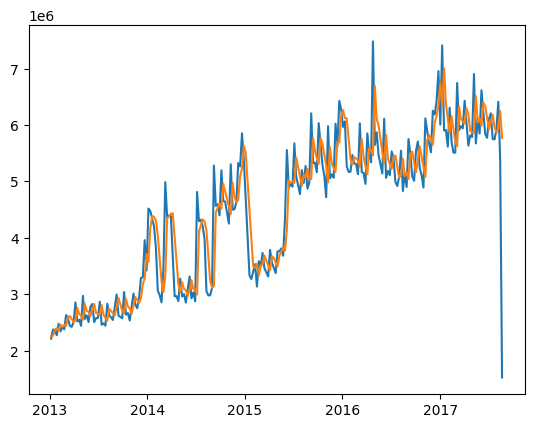

In [98]:
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#look at data
plt.plot(weekly_sales)

# Set the value of Alpha and define m (Time Period)
m = 52
alpha = 1/(2*m)
weekly_sales['HWES2_ADD'] = ExponentialSmoothing(weekly_sales,trend='add').fit().fittedvalues
plt.plot(weekly_sales.HWES2_ADD)
plt.show()


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

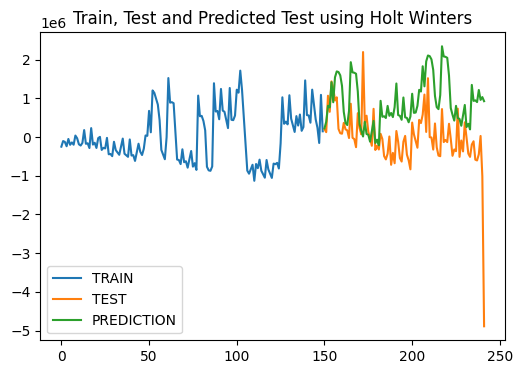

In [99]:
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(92)
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [100]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')
print(f'MAPE = {mean_absolute_percentage_error(test,test_predictions)}')
print(f'Root Mean Squared Error = {root_mean_squared_error(test,test_predictions)}')


Mean Absolute Error = 981277.477198289
Mean Squared Error = 1586521145866.6604
MAPE = 17.25726081165878
Root Mean Squared Error = 1259571.8105239815


In [101]:
train_copy.head(5)
family=train_copy.family.tolist()

In [102]:
train_copy.head(3)
len(train_copy)

wd_df= train_copy.groupby(['date']).agg({'sales' : 'sum', 'onpromotion' : 'sum'})

wd_df.head(7)

#family=wd_df.family.tolist()


,sales,onpromotion
date,,
2013-01-01,2511.618999,0.0
2013-01-02,496092.417944,0.0
2013-01-03,361461.231124,0.0
2013-01-04,354459.677093,0.0
2013-01-05,477350.121229,0.0
2013-01-06,519695.401088,0.0
2013-01-07,336122.801066,0.0


want to predict sales on holidays,onpromotion,monthnumber,oilprices


In [103]:
combined_df.head(4)

,date,store_nbr,family,sales,onpromotion,monthname,monthnumber,dayname,day,year,type,locale,locale_name,description,transferred
0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,January,1,Tuesday,1,2013,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,BABY CARE,0.0,0.0,January,1,Tuesday,1,2013,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,1,BEAUTY,0.0,0.0,January,1,Tuesday,1,2013,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,1,BEVERAGES,0.0,0.0,January,1,Tuesday,1,2013,Holiday,National,Ecuador,Primer dia del ano,False


In [104]:

### Merging the sales and oil dataframes
comb_df = pd.merge(wd_df, oil_df , on='date', how='left')
ml_df = pd.merge(comb_df, hdays_df , on='date', how='left')
#ml_df['family']= wd_df.family.tolist()

In [105]:
ml_df.head(7)
#len(ml_df)

,date,sales,onpromotion,dcoilwtico,type,locale,locale_name,description,transferred
0,2013-01-01,2511.618999,0.0,93.139999,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-02,496092.417944,0.0,93.139999,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,361461.231124,0.0,92.970001,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,354459.677093,0.0,93.120003,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,477350.121229,0.0,NaN,Work Day,National,Ecuador,Recupero puente Navidad,False
5,2013-01-06,519695.401088,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2013-01-07,336122.801066,0.0,93.199997,NaN,NaN,NaN,NaN,NaN


In [106]:

#for type replace nan with normal day
#drop locale name,transferred,description
#change nan in locale to none
#change nan to backfill in oil 

ml_df.drop(columns = ['locale_name','transferred','description'],inplace = True)



In [107]:
ml_df.head(2)

,date,sales,onpromotion,dcoilwtico,type,locale
0,2013-01-01,2511.618999,0.0,93.139999,Holiday,National
1,2013-01-02,496092.417944,0.0,93.139999,NaN,NaN


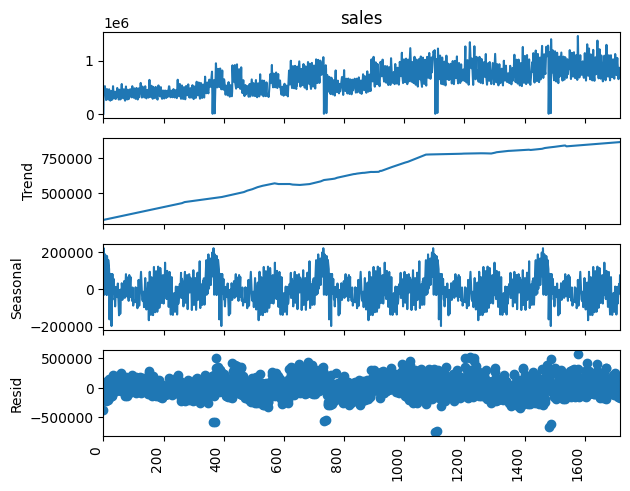

In [108]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
##Overflow Issue resolution
import matplotlib.style as mplstyle
mplstyle.use('fast')
#ts = train_copy.set_index('date')['sales'] 
result = seasonal_decompose(ml_df.sales, model='additive', period=365,extrapolate_trend= 'freq')

result.plot()
plt.xticks(rotation=90, ha='right')
plt.show()

In [109]:
# there is trend and seasonality in the data. Lets remove the trend from the data using shift
# Shift values based on 'Product'
#ml_as['shift_sales'] = ml_.groupby('family')['sales'].shift(14)
ml_as=ml_df
ml_as['sqrt_sales'] = np.sqrt(ml_as['sales']/1000)
ml_as.dropna(inplace = True)
ml_as.set_index('date', inplace=True)
ml_as.head(15)

,sales,onpromotion,dcoilwtico,type,locale,sqrt_sales
date,,,,,,
2013-01-01,2511.618999,0.0,93.139999,Holiday,National,1.584809
2013-02-11,278627.588926,0.0,97.010002,Holiday,National,16.692142
2013-02-12,308800.790912,0.0,97.480003,Holiday,National,17.572729
2013-04-01,428816.447912,0.0,97.099998,Holiday,Regional,20.707884
2013-04-12,314394.967035,0.0,91.230003,Holiday,Local,17.731186
2013-04-29,328795.874018,0.0,94.089996,Holiday,National,18.132729
2013-05-01,507974.636889,0.0,90.739998,Holiday,National,22.538293
2013-05-24,398389.241982,0.0,93.839996,Holiday,National,19.959690
2013-06-25,305119.530064,0.0,95.250000,Holiday,Regional,17.467671


In [110]:
## Test for stationarity using AD Fuller Test

from statsmodels.tsa.stattools import adfuller
 

# ADF Test
result = adfuller(ml_as.sqrt_sales)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
if result[1] > 0.05:
    print('The AdFuller test fails to reject the null hypothesis and therefore is not Stationary')
else:
    print('The Series is stationary')

ADF Statistic: -3.724587709342252
n_lags: 0.0037803018089151118
p-value: 0.0037803018089151118
Critial Values:
   1%, -3.463987334463603
Critial Values:
   5%, -2.8763259091636213
Critial Values:
   10%, -2.5746515171738515
The Series is stationary


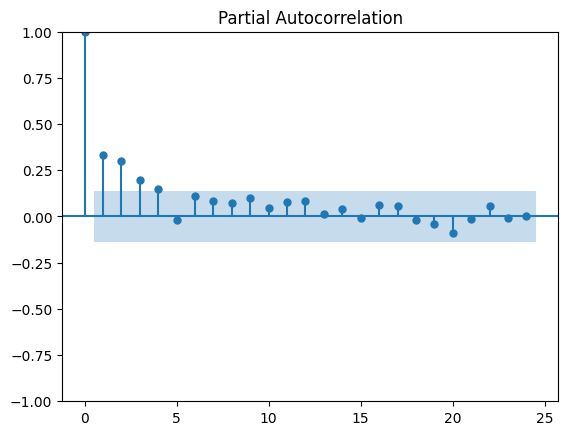

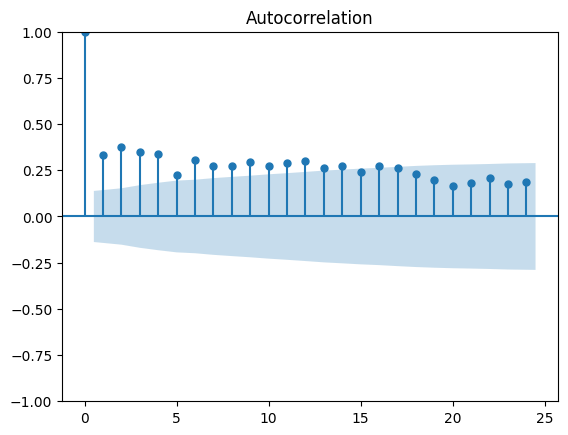

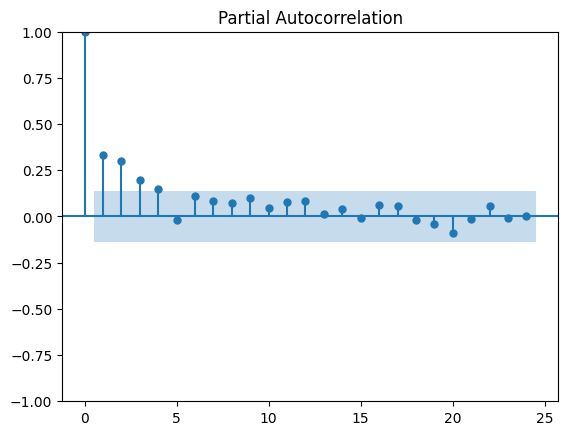

In [111]:
# ## Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# plot the auto correlation
plot_acf(ml_as.sqrt_sales)
plot_pacf(ml_as.sqrt_sales)

In [112]:
## Autocorrelation Tests using Ljung-Box method

from statsmodels.stats.diagnostic import acorr_ljungbox


# Perform the Ljung-Box test
lags = 7  # Number of lags to consider
results = acorr_ljungbox(ml_as.sqrt_sales, lags=lags,return_df=True)

# Print the test statistic and p-value
lb_p_value = results['lb_pvalue'][1] 
lb_test_statistic = results['lb_stat'][1] 
print(lb_p_value)


if lb_p_value < 0.05:
    print('Reject null hypothesis ,autocorrelation pesent')
else:
    print('Accept null hypothesis of no autocorrelation')


2.2871120474394084e-06
Reject null hypothesis ,autocorrelation pesent


In [113]:
## now lets create the imputers,etx

In [114]:
X_train = ml_as[ml_as.index < '06-01-2016'] 
X_test = ml_as[ml_as.index > '06-01-2016'] 

y_train = ml_as[ml_as.index < '06-01-2016'].sqrt_sales 
y_test = ml_as[ml_as.index > '06-01-2016'] .sqrt_sales

len(y_train)
y_train

date
2013-01-01     1.584809
2013-02-11    16.692142
2013-02-12    17.572729
2013-04-01    20.707884
2013-04-12    17.731186
                ...    
2016-05-12    24.564084
2016-05-13    25.823127
2016-05-16    27.351649
2016-05-24    24.624728
2016-05-27    29.200843
Name: sqrt_sales, Length: 155, dtype: float64

In [115]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [116]:
# Looking at the descriptive statistics of the columns with numeric values
numerics = [column for column in ml_as.columns if (ml_as[column].dtype != "O")]
print("Summary table of the Descriptive Statistics of Columns with Numeric Values")
ml_as[numerics].describe()

Summary table of the Descriptive Statistics of Columns with Numeric Values


,sales,onpromotion,dcoilwtico,sqrt_sales
count,2.010000e+02,201.000000,201.000000,201.000000
mean,6.511990e+05,5972.497512,64.963184,24.731532
std,2.652080e+05,6008.999038,25.318033,6.304611
min,0.000000e+00,0.000000,27.959999,0.000000
25%,4.707312e+05,395.000000,45.110001,21.696340
50%,6.577634e+05,4281.000000,52.619999,25.646898
75%,7.928653e+05,10605.000000,95.139999,28.157864
max,1.402306e+06,23427.000000,107.949997,37.447381


In [117]:
# Looking at the descriptive statistics of the columns with numeric values
cats = [column for column in ml_as.columns if (ml_as[column].dtype == "O")]
print("Summary table of the Descriptive Statistics of Columns with Numeric Values")
ml_as[cats].describe()

Summary table of the Descriptive Statistics of Columns with Numeric Values


,type,locale
count,201,201
unique,5,3
top,Holiday,National
freq,130,103


In [118]:
numerics = ['dcoilwtico','onpromotion']
cats =['locale','type']

In [119]:
from sklearn.model_selection import * 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor



In [120]:
from sklearn.svm import SVR
import xgboost as xgb
all_models_pipelines = {
              "Xgboost": (xgb.XGBRegressor(n_estimators=1000)),
              "SVR": SVR(C=1), 

              
              }

In [121]:
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

numeric_transformer = Pipeline(steps = [
     ('num_imputer', SimpleImputer(strategy = 'median')),
    ('num', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerics),
        ('cat', cat_transformer, cats)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(n_estimators=1000))
])

pipeline




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num',
                                                                   StandardScaler())]),
                                                  ['dcoilwtico',
                                                   'onpromotion']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['locale', 'type'])])),
                ('model',
                 XGBRegressor(base_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [122]:

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers = [('num', numeric_transformer , numerics),
                    ('cat', cat_transformer , cats),
     
                    ])

In [123]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num',
                                                                   StandardScaler())]),
                                                  ['dcoilwtico',
                                                   'onpromotion']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['locale', 'type'])])),
                ('model',
                 XGBRegressor(base_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [124]:
#feature importance

pipeline.named_steps['model'].feature_importances_

array([0.07310408, 0.30937344, 0.04543134, 0.2180494 , 0.00169642,
       0.16386473, 0.00109376, 0.00750181, 0.15496121, 0.02492383],
      dtype=float32)

In [125]:
y_pred = pipeline.predict(X_test)

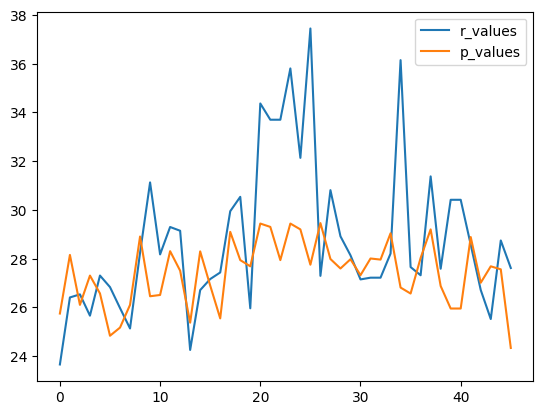

In [126]:
df = pd.DataFrame({'r_values':(y_test.reshape(-1)), 'p_values':y_pred})
# df['r_values']=np.exp(df.r_values)*1000
# df['p_values']=np.exp(df.p_values)*1000
# df
df.r_values.plot(legend = True)
df.p_values.plot(legend= True)
plt.show()

In [127]:
mae = mean_absolute_error(df.r_values, df.p_values)
mse = mean_squared_error(df.r_values, df.p_values)
mape = mean_absolute_percentage_error(df.r_values, df.p_values)
#rmse=np.sqrt(root_mean_squared_error(test, prediction))
rmse=root_mean_squared_error(df.r_values, df.p_values)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 2.2469912269248984
MSE: 9.787692195719833
RMSE: 3.128528758972791
MAPE: 0.07302140276832705


In [128]:
# Create a function to model and return comparative model evaluation scores,perform the SMOTE on each model pipeline,to calculate and compare accuracy

def evaluate_models(model_pipelines = all_models_pipelines, X_test = X_test, y_test = y_test):

    ## Dictionary for trained models
    trained_models = dict()

    ## Create a dataframe matrix to all pipelines
    #all_confusion_matrix = []
    
    
    ## List to receive scores
    performances = []
    for name, model_pipeline in model_pipelines.items():
        final_pipeline = Pipeline(steps=[("preprocessor", preprocessor), 
                                   
                           ("model", model_pipeline)])
    


        
        final_pipeline.fit(X_train,  y_train)
       

        ## Predict and calculate performance scores
        y_pred = final_pipeline.predict(X_test)
        performances.append([name,
                             mean_absolute_error(y_test, y_pred),  ## accuracy
                             mean_squared_error(y_test, y_pred),  ## precisions
                             mean_absolute_percentage_error(y_test, y_pred),  ## recall
                             root_mean_squared_error(y_test, y_pred)
                             ])

    
    # Compile accuracy
    df_compare = pd.DataFrame(performances, columns = ["model", "MAE", "MSE", "MAPE", "RSME"])
    df_compare.set_index("model", inplace = True)
    df_compare.sort_values(by = ["RSME", "MAPE"], ascending = True, inplace=True)
    return df_compare, trained_models

In [129]:
# Run the function to train models and return performances
all_models_eval, trained_models = evaluate_models()
all_models_eval

,MAE,MSE,MAPE,RSME
model,,,,
Xgboost,2.246991,9.787692,0.073021,3.128529
SVR,2.748593,15.160110,0.087997,3.893599


`HYPERPARAMETER TUNING` 

##### For XGBoost: https://kshitizregmi.github.io/posts/2022/10/XGBoost_Hyperparameter_tuning%20XGBRegressor_XGBoost%20Regression/

In [130]:

hyperparameter_grid = {
    'model__n_estimators': [100, 600, 800,1200,5000],
    'model__max_depth': [3, 6, ],
    'model__learning_rate': [0.05, 0.1, 0.20,0.4,1],
    }

pipeline = RandomizedSearchCV(
    Pipeline(steps=[("preprocessor", preprocessor), 
                    ("model", xgb.XGBRegressor(objective= 'reg:squarederror',seed = 0))
                    ]),
    param_distributions=hyperparameter_grid,
    n_iter=20,
    scoring='r2',
    n_jobs=-1,
    cv=7,
    verbose=3)

In [131]:
pipeline.fit(X_train, y_train)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('num_imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('num',
                                                                                                StandardScaler())]),
                                                                               ['dcoilwtico',
                                                                                'onpromotion']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('cat_imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder())]),
                                                                               ['locale',
                                                                                'type...
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.05, 0.1, 0.2,
                                                                 0.4, 1],
                                        'model__max_depth': [3, 6],
                                        'model__n_estimators': [100, 600, 800,
                                                                1200, 5000]},
                   scoring='r2', verbose=3)

In [132]:
hyperparam = pipeline.best_params_
print("The best Hyperparameters for XGBRegressor are: {}".format(hyperparam))

The best Hyperparameters for XGBRegressor are: {'model__n_estimators': 1200, 'model__max_depth': 3, 'model__learning_rate': 0.2}


In [133]:
ypred = pipeline.predict(X_test)
print("MAPE: ",mean_absolute_percentage_error(ypred,y_test))
print("MSE: ", mean_squared_error(ypred, y_test))
print("MAE: ", mean_absolute_error(ypred, y_test))

MAPE:  0.07605883307004271
MSE:  8.748346805554343
MAE:  2.113064991073083


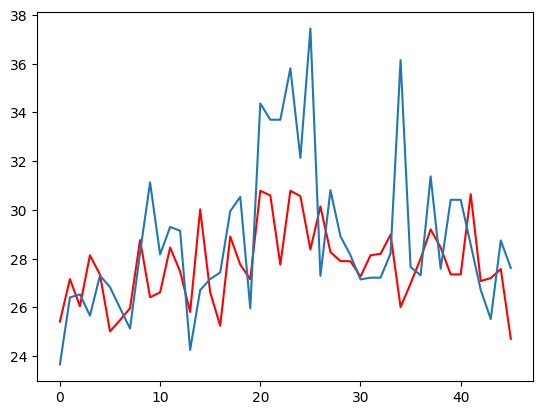

In [134]:
plt.plot(ypred,color='red')
plt.plot(y_test)

`Persisting the model`
### Saving the model

In [135]:
for name, model_pipeline in all_models_pipelines.items():
    joblib.dump(model_pipeline,f'models\{name}.joblib')

NameError: name 'joblib' is not defined

In [ ]:
joblib.dump(best_gs_pred ,'models\\tuned\\best_gs_pred .joblib')
joblib.dump(best_search_pred,'models\\tuned\\best_search_pred.joblib')
joblib.dump(best_catboost_pred,'models\\tuned\\best_catboost_pred.joblib')
joblib.dump(best_svc_pred,'models\\tuned\\best_svc_pred.joblib')